## Artificial sphere maker

In [8]:
import numpy as np
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.draw import ellipsoid
from skimage.draw import disk
from scipy import ndimage
#import napari
import matplotlib.pyplot as plt
#from functions import sphere_maker, return_overlap_segmentation, return_overlapping_pixels, overlapping_objects_with_size, remove_objects, get_overlap, get_object_size
import pandas as pd
import time
from scipy.sparse import coo_array
import sys
import os
from csbdeep.io import save_tiff_imagej_compatible

In [9]:
def sphere_maker(coords, Img, Label):
    y_I = coords[0]
    x_I = coords[1]
    z_I = coords[2]
    r = coords[3]
    #x_I, y_I, z_I are the center of the sphere
    #r is the radius
    
    z_Top = z_I+r # top most plane there will be a circle in
    z_Bottom = z_I-r # bottom most plane there will be a circle in
    
    for z in range(z_Bottom, z_Top+1):
        x = np.sqrt((r**2 - (z-z_I)**2)) # x is the new radius for this slice. 
        rr, cc = disk((y_I, x_I), x)
        Img[rr,cc,z]=Label
        
    return Img


In [10]:
def display_images(imageA, imageB):
   
    # Create subplots
    fig, axes = plt.subplots(1, 2)
    
    # Display images
    axes[0].imshow(imageA)
    axes[0].set_title('ImageA')
    axes[0].axis('off')
    
    axes[1].imshow(imageB)
    axes[1].set_title('ImageB')
    axes[1].axis('off')
    
    plt.show()

In [11]:
def display_images_3d(imageA, imageB):
    # Plot the result
    fig, axes = plt.subplots(1, 2,  subplot_kw={'projection': '3d'})
    axes[0].voxels(imageA)
    axes[0].set_title('ImageA')
    #axes[0].axis('off')
    
    axes[1].voxels(imageB)
    axes[1].set_title('ImageB')
    #axes[1].axis('off')
    
    plt.show()

In [12]:
def image_maker(dims,spots,labels):
    # Assert labels and spots have same length
    assert len(spots) == len(labels), "Variables are not of the same length"
    Img = np.zeros(dims)
    for x in range(0,len(spots)):
        Img = sphere_maker(spots[x], Img, labels[x])
        
    return Img

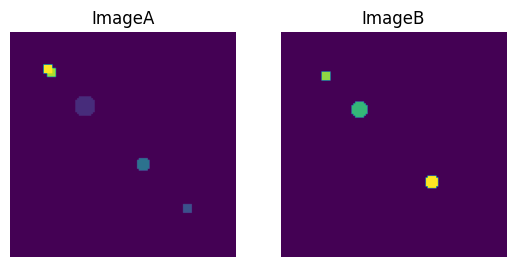

In [27]:
x = 128 #columns
y = 128 #rows
z = 20 #slices

dims = (y,x,z) #make an argument for the dimensions
#Img_A = np.zeros(dims) # initialize Image A as zeros
#Img_B = np.zeros(dims) # initialize Image B as zeros
#Img_compare = np.zeros(dims)

####
# Set up the coordinates and radius of the centers of the 'nuclei'
# nuclei in A: coords = x, y, z centers, radius (x,y,z,r)

ImageA_spots = [(42, 42, 6, 6), 
                 (100, 100, 4,3),
                 (75, 75, 6, 4),
                 (23, 23, 4, 3),
                 (21, 21, 4, 3)]

ImageA_labels = [1,2,3,7,8]


ImageB_spots = [(44, 44, 6, 5),
                (25, 25, 4, 3),
                (85, 85, 6, 4)]

ImageB_labels= [4,5,6]

Img_A = image_maker(dims,ImageA_spots,ImageA_labels)
Img_B = image_maker(dims,ImageB_spots,ImageB_labels)

Img_A = np.uint16(Img_A)
Img_B = np.uint16(Img_B)

#plt.imshow(Img_A[:,:,5])
#plt.imshow(Img_B[:,:,5])

display_images(Img_A[:,:,5], Img_B[:,:,5])


In [28]:
save_path = '/camp/home/fallest/working/fallest/Vanessa_Dao_Project/test_data/'

if not os.path.exists(save_path):
    os.makedirs(save_path)


save_tiff_imagej_compatible(save_path+'Img_A_labels.tif', Img_A, axes='YXZ')
save_tiff_imagej_compatible(save_path+'Img_B_labels.tif', Img_B, axes='YXZ')   

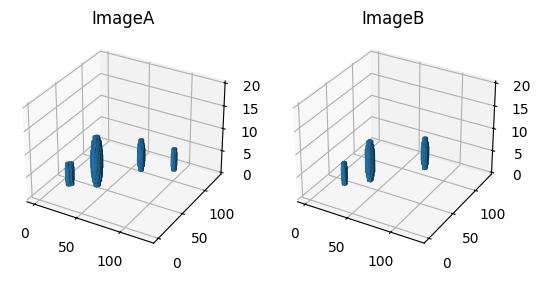

In [15]:
display_images_3d(Img_A, Img_B)